In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('data_tau_ta.csv')

In [79]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags,named_entities
0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,"['10', 'years', 'open', 'source', 'machine', '...",10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning,"[('10', 'CD'), ('Years', 'NNS'), ('of', 'IN'),...",['Open Source Machine']
1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,"['machines', 'learn', 'apple', 'watch', 'detec...",What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...,"[('What', 'WP'), ('machines', 'NNS'), ('can', ...",['Apple Watch']
2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,"['deep', 'roots', 'javascript', 'fatigue']",The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue,"[('The', 'DT'), ('Deep', 'NNP'), ('Roots', 'NN...","['Deep Roots', 'Javascript Fatigue']"
3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,"['data', 'science', 'intro', 'math', 'phys', '...",Data science intro for math/phys background,Data science intro for math/phys background,"[('Data', 'NNP'), ('science', 'NN'), ('intro',...",['Data']
4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"['data', 'science', 'pop', 'austin', 'tx']","Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX","[('Data', 'NNP'), ('Science', 'NNP'), ('Pop', ...","['Data Science Pop', 'Austin']"


In [80]:
df.shape

(180, 8)

In [81]:
import nltk

In [82]:
from nltk.corpus import stopwords

In [83]:
stop = stopwords.words('english')

In [84]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [85]:
tokens_list = df['tokens'].tolist()

In [86]:
tokens_list

["['10', 'years', 'open', 'source', 'machine', 'learning']",
 "['machines', 'learn', 'apple', 'watch', 'detecting', 'undiagnosed', 'heart', 'condition']",
 "['deep', 'roots', 'javascript', 'fatigue']",
 "['data', 'science', 'intro', 'math', 'phys', 'background']",
 "['data', 'science', 'pop', 'austin', 'tx']",
 "['data', 'science', 'tools', 'biggest', 'winners', 'losers']",
 "['analyzing', 'golden', 'state', 'warriors', 'passing', 'network', 'using', 'graphframes', 'spark']",
 "['making', 'transparent', 'variations', 'analytical', 'choices', 'affect', 'results']",
 "['neural', 'networks', 'demystified']",
 "['conversion', 'rate', 'changed', 'bayesian', 'timeseries', 'analysis', 'python']",
 "['descriptive', 'statistics', 'sql']",
 "['xgboost4j', 'portable', 'distributed', 'xgboost', 'spark', 'flink', 'dataflow']",
 "['introduction', 'scikit', 'flow', 'simplified', 'interface', 'tensorflow']",
 "['personality', 'space', 'cartoon', 'characters']",
 "['machine', 'learning', 'depth', 'non'

In [87]:
frequency_words = {}
for data in tokens_list:
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace("'","")
    data_list = data.split(',')
    for token in data_list:
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1
    


In [88]:
frequency_words

{'': 1,
 ' #': 1,
 ' &': 1,
 ' ***': 1,
 ' +': 2,
 ' ++': 1,
 ' .*:': 1,
 ' 0': 2,
 ' 1': 5,
 ' 101': 1,
 ' 16': 1,
 ' 2': 5,
 ' 2016': 2,
 ' 3': 3,
 ' 4': 1,
 ' 50': 2,
 ' 675': 1,
 ' 88': 1,
 ' 8m': 1,
 ' ??': 1,
 ' ???': 3,
 ' @': 2,
 ' affect': 1,
 ' age': 1,
 ' agree': 1,
 ' aka': 1,
 ' algorithms': 1,
 ' almost': 1,
 ' amazon': 1,
 ' analogies': 1,
 ' analysis': 9,
 ' analytical': 1,
 ' analytics': 1,
 ' analyzer': 1,
 ' analyzing': 1,
 ' ancient': 1,
 ' animated': 1,
 ' anywhere': 1,
 ' apache': 5,
 ' api': 4,
 ' app': 1,
 ' apple': 1,
 ' archive': 1,
 ' arrow': 1,
 ' art': 1,
 ' article': 1,
 ' artificial': 2,
 ' artists': 1,
 ' asked': 1,
 ' austin': 1,
 ' authoring': 1,
 ' automated': 1,
 ' aws': 1,
 ' aylien': 1,
 ' b': 1,
 ' background': 1,
 ' based': 2,
 ' basket': 1,
 ' bay': 1,
 ' bayesian': 4,
 ' beginners': 1,
 ' bengio': 1,
 ' best': 1,
 ' better': 2,
 ' big': 2,
 ' biggest': 1,
 ' blending': 1,
 ' blogs': 1,
 ' boosting': 2,
 ' bootstrap': 1,
 ' bowl': 1,
 ' building

In [89]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [90]:
df_tfidf.head()

,word,tf
0,twitter,5
1,video,2
2,billion,2
3,impact,1
4,learning,28


In [91]:
df_tfidf.sort(ascending=False,columns='tf',inplace=True)

/Users/amitkaps/Documents/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [92]:
df_tfidf.head()

,word,tf
654,data,34
4,learning,28
394,science,21
550,r,11
123,machine,11


In [107]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [108]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [109]:
df_tfidf.head()

,word,tf,document_count
654,data,34,37
4,learning,28,28
394,science,21,21
550,r,11,32
123,machine,11,11


In [110]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [111]:
total_docs

180

** let us compute the tfidf ** 

**tfidf = tf . idf**

**idf = log(total_docs/number of documents that contain the word)**

In [112]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [116]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [117]:
df_tfidf.head()

,word,tf,document_count,tfidf
654,data,34,37,23.360407
4,learning,28,28,22.627205
394,science,21,21,19.594117
550,r,11,32,8.251348
123,machine,11,11,13.352678


In [118]:
df_tfidf.tail()

,word,tf,document_count,tfidf
259,daily,1,1,2.255273
260,pledgeforparity,1,1,2.255273
261,ligo,1,1,2.255273
262,regression,1,1,2.255273
695,limits,1,1,2.255273


In [119]:
df_tfidf.sort(columns='tfidf',ascending=True,inplace=True)

/Users/amitkaps/Documents/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [120]:
df_tfidf.head()

,word,tf,document_count,tfidf
636,,1,180,0.000000
109,f,1,57,0.499398
231,b,1,54,0.522879
460,c,1,48,0.574031
25,learn,1,35,0.711204


In [121]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [122]:
df_tfidf.head()

,word,tf,document_count,tfidf
636,,1,180,0.100000
109,f,1,57,0.499398
231,b,1,54,0.522879
460,c,1,48,0.574031
25,learn,1,35,0.711204


In [123]:
df_tfidf.set_index('word', inplace=True)

In [124]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
,1,180,0.100000
f,1,57,0.499398
b,1,54,0.522879
c,1,48,0.574031
learn,1,35,0.711204


** now let us plot a word cloud to see the prominence of the word **

In [125]:
wordcloud = WordCloud()

In [126]:
word_tfidf = df_tfidf['tfidf'].to_dict()

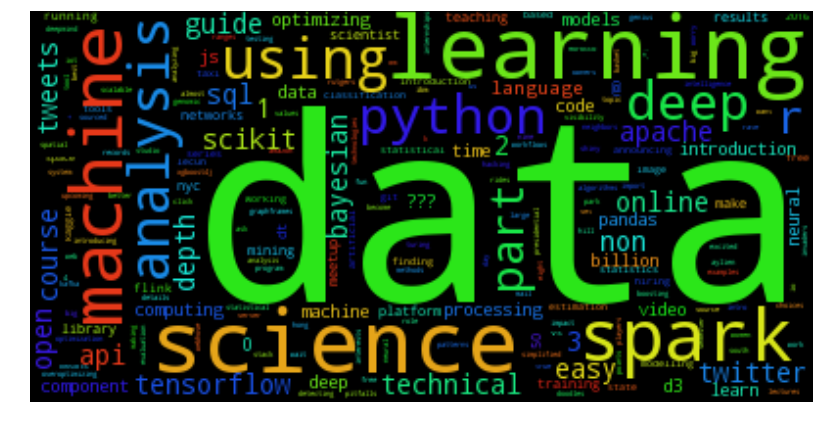

In [127]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Topic modelling


In [129]:
import lda
import numpy as np
import lda.datasets
import sklearn.feature_extraction.text as text

** we are using the pre built reuters data set **

Generating the document term matrix

In [155]:
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=1)

In [156]:
dtm = vectorizer.fit_transform(df.title).toarray()

In [157]:
dtm

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Loading the vocabulary

In [158]:
vocab = np.array(vectorizer.get_feature_names())

In [159]:
vocab

array(['10', '101', '16', '2016', '50', '675', '88', '8m', 'access',
       'affect', 'age', 'agree', 'aka', 'algorithms', 'alphago', 'amazon',
       'analogies', 'analysis', 'analytical', 'analytics', 'analyzer',
       'analyzing', 'ancient', 'animated', 'announcing', 'answers',
       'apache', 'api', 'app', 'apple', 'applied', 'archive', 'arrow',
       'art', 'article', 'artificial', 'artists', 'ask', 'asked', 'austin',
       'authoring', 'auto', 'automate', 'automated', 'aws', 'aylien',
       'background', 'ballr', 'based', 'basket', 'bay', 'bayesian',
       'beginners', 'bengio', 'best', 'better', 'big', 'biggest',
       'billion', 'blending', 'blogs', 'boosting', 'bootstrap', 'bowl',
       'building', 'caffe', 'calculations', 'campaigns', 'careers',
       'cartoon', 'categorical', 'causal', 'causality', 'census',
       'certified', 'change', 'changed', 'changes', 'channel',
       'characters', 'charts', 'cheat', 'choice', 'choices',
       'classification', 'classifier

In [168]:
titles = df.title


In [160]:
model = lda.LDA(n_topics=5, n_iter=500, random_state=1)

In [161]:
model.fit(dtm)

In [ ]:
model.topic_word_

In [162]:
topic_word = model.topic_word_ 

In [163]:
topic_word

array([[  5.91680966e-05,   5.97597775e-03,   5.91680966e-05, ...,
          5.91680966e-05,   5.91680966e-05,   5.91680966e-05],
       [  4.56600155e-05,   4.56600155e-05,   4.56600155e-05, ...,
          4.56600155e-05,   4.56600155e-05,   4.56600155e-05],
       [  5.84761125e-05,   5.84761125e-05,   5.84761125e-05, ...,
          5.84761125e-05,   5.84761125e-05,   5.84761125e-05],
       [  4.76167802e-05,   4.76167802e-05,   4.80929480e-03, ...,
          4.76167802e-05,   4.80929480e-03,   4.76167802e-05],
       [  5.04974751e-03,   4.99975001e-05,   4.99975001e-05, ...,
          5.04974751e-03,   4.99975001e-05,   5.04974751e-03]])

In [164]:
n_top_words = 8

In [140]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: spark apache guide non pandas technical intro
Topic 1: data science course big sql d3 free
Topic 2: twitter statistical api computing optimizing tweets language
Topic 3: analysis using learn neural bayesian python code
Topic 4: learning machine deep tensorflow introduction depth open


In [174]:
doc_topic = model.doc_topic_

In [175]:
for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("topic: {} , {}".format(topic_most_pr,titles[n]))

topic: 4 , 10 Years of Open Source Machine Learning
topic: 3 , What machines can learn from Apple Watch: detecting undiagnosed heart condition
topic: 4 , The Deep Roots of Javascript Fatigue
topic: 1 , Data science intro for math/phys background
topic: 1 , Data Science Pop-Up in Austin, TX
topic: 1 , Data Science Tools: The Biggest Winners and Losers
topic: 0 , Analyzing Golden State Warriors' passing network using GraphFrames in Spark
topic: 3 , Making transparent how variations in analytical choices affect results
topic: 3 , Neural Networks demystified
topic: 3 , Has your conversion rate changed? Bayesian timeseries analysis with Python


# Sentiment Analysis


In [176]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [177]:
pos_features = []
neg_features = []

In [178]:
def make_full_dict(word):
    return dict([(word, True)])

In [179]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [180]:
pos_features

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [181]:
with open('negative_words.txt','r',encoding='utf-8') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [182]:
neg_features

[[{'2-faced': True}, 'neg'],
 [{'2-faces': True}, 'neg'],
 [{'abnormal': True}, 'neg'],
 [{'abolish': True}, 'neg'],
 [{'abominable': True}, 'neg'],
 [{'abominably': True}, 'neg'],
 [{'abominate': True}, 'neg'],
 [{'abomination': True}, 'neg'],
 [{'abort': True}, 'neg'],
 [{'aborted': True}, 'neg'],
 [{'aborts': True}, 'neg'],
 [{'abrade': True}, 'neg'],
 [{'abrasive': True}, 'neg'],
 [{'abrupt': True}, 'neg'],
 [{'abruptly': True}, 'neg'],
 [{'abscond': True}, 'neg'],
 [{'absence': True}, 'neg'],
 [{'absent-minded': True}, 'neg'],
 [{'absentee': True}, 'neg'],
 [{'absurd': True}, 'neg'],
 [{'absurdity': True}, 'neg'],
 [{'absurdly': True}, 'neg'],
 [{'absurdness': True}, 'neg'],
 [{'abuse': True}, 'neg'],
 [{'abused': True}, 'neg'],
 [{'abuses': True}, 'neg'],
 [{'abusive': True}, 'neg'],
 [{'abysmal': True}, 'neg'],
 [{'abysmally': True}, 'neg'],
 [{'abyss': True}, 'neg'],
 [{'accidental': True}, 'neg'],
 [{'accost': True}, 'neg'],
 [{'accursed': True}, 'neg'],
 [{'accusation': True}

In [184]:
len(pos_features),len(neg_features)

(8020, 4783)

In [186]:
trainFeatures = pos_features + neg_features

In [187]:
trainFeatures

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [188]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [189]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [190]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [191]:
import re

In [ ]:
neg_test = 'I hate data science'

In [218]:
title_words = re.findall(r"[\w']+|[.,!?;]", 'I have a love and hate relationship with data science')

In [219]:
title_words

['I',
 'have',
 'a',
 'love',
 'and',
 'hate',
 'relationship',
 'with',
 'data',
 'science']

In [220]:
test=[]

In [221]:
test.append([make_full_dict_sent(title_words),''])

In [222]:
test

[[{'I': True,
   'a': True,
   'and': True,
   'data': True,
   'hate': True,
   'have': True,
   'love': True,
   'relationship': True,
   'science': True,
   'with': True},
  '']]

In [223]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

pos


In [198]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc)
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    

pos 10 Years of Open Source Machine Learning
pos What machines can learn from Apple Watch: detecting undiagnosed heart condition
pos The Deep Roots of Javascript Fatigue
pos Data science intro for math/phys background
pos Data Science Pop-Up in Austin, TX
pos Data Science Tools: The Biggest Winners and Losers
pos Analyzing Golden State Warriors' passing network using GraphFrames in Spark
pos Making transparent how variations in analytical choices affect results
pos Neural Networks demystified
pos Has your conversion rate changed? Bayesian timeseries analysis with Python
pos Descriptive Statistics in SQL
pos XGBoost4J: Portable Distributed XGboost in Spark, Flink and Dataflow
pos Introduction to Scikit Flow -  Simplified Interface to TensorFlow
pos The Personality Space of Cartoon Characters
pos Machine Learning: An In-Depth, Non-Technical Guide???Part 4
pos How to learn machine learning?
pos How do we make Data Tau work?
pos 7 Big Data Technologies and When to Use Them that All Data En